#Seaborn
##- matplotlib 바탕으로 다양한 함수 사용을 돕은 일종의 래버(wrapper)모듈
##- matplotlib과 동일한 결과물이 나오며, 작성 과정이 간단함
##1. 그림 객체나 축 객체 같은 복잡한 개념이 없음
##2. xticks 설정하지 않아도 각 축에 라벨 자동으로 생성함
##3. 데이터프레임과 x,y에 해당하는 열 이름만 지정하면 됨


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fmri = sns.load_dataset('fmri')#sns에서 제공하는 데이터
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


<Axes: xlabel='timepoint', ylabel='signal'>

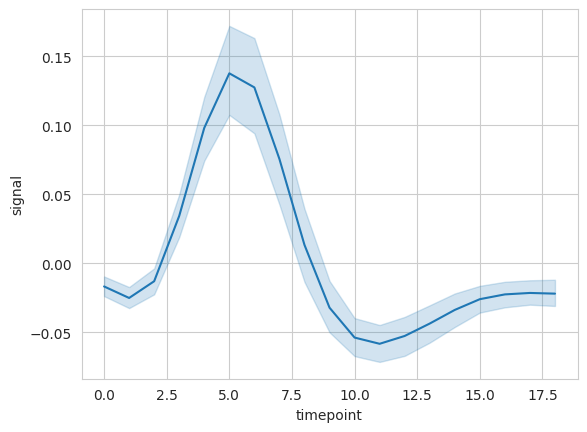

In [14]:
sns.set_style('whitegrid')#그래프 색상 스타일 설정 (dark.. 여러가지 있다)
sns.lineplot(x='timepoint',y='signal',data = fmri)

In [16]:
fmri.sample(n=10,random_state=1)

,subject,timepoint,event,region,signal
806,s6,18,cue,parietal,0.019532
691,s5,15,cue,frontal,-0.019507
148,s5,8,stim,parietal,0.006805
676,s13,0,cue,parietal,-0.018394
156,s11,7,stim,parietal,0.254042
27,s1,17,stim,parietal,-0.038021
200,s11,4,stim,parietal,0.087175
262,s3,0,stim,parietal,-0.008576
94,s4,12,stim,parietal,-0.090036
339,s4,5,stim,frontal,0.455575


<Axes: xlabel='timepoint', ylabel='signal'>

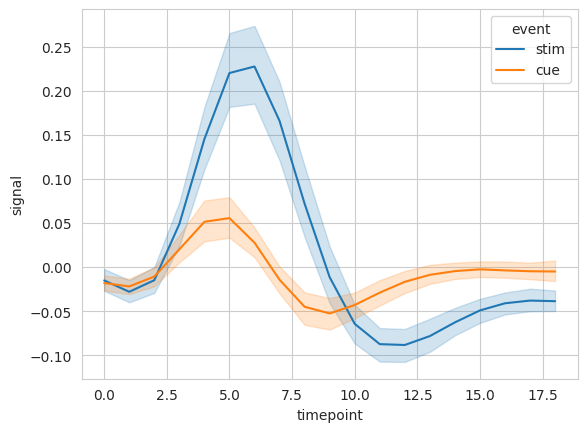

In [17]:
sns.lineplot(x='timepoint',y='signal',hue='event',data=fmri)#hue : event별로 나누기

In [18]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

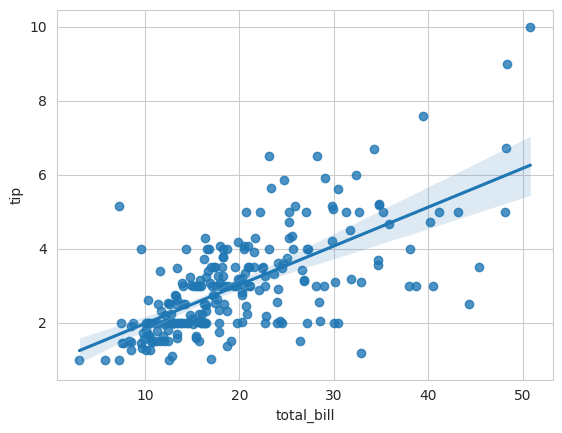

In [19]:
sns.regplot(x='total_bill',y='tip', data = tips, x_ci=95)#선형회귀(산점도 분포에 따른 기울기)

<Axes: xlabel='total_bill', ylabel='tip'>

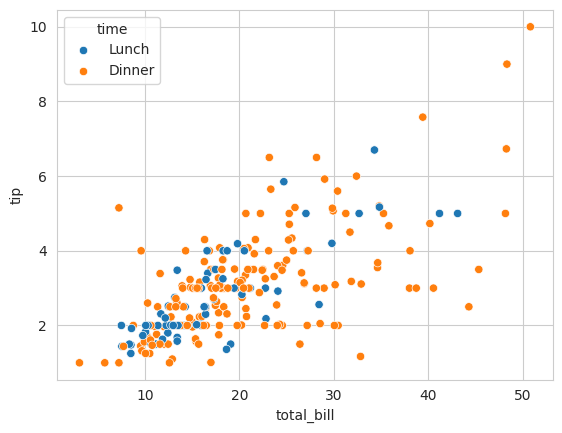

In [20]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='time')#시간에 따른 가격 표현
#Dinner가 lunch에 비해 사람들이 많이 오고, 비싼 음식도 많아 보임

<Axes: xlabel='smoker', ylabel='count'>

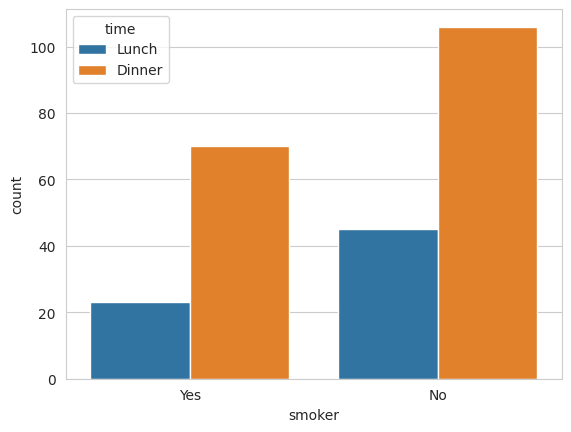

In [25]:
sns.countplot(x='smoker',hue='time',data=tips)
#전체적으로 lunch보다 dinner에 사람이 더 많고
#흡연자보단 비흡연자가 더 많다

<Axes: xlabel='day', ylabel='total_bill'>

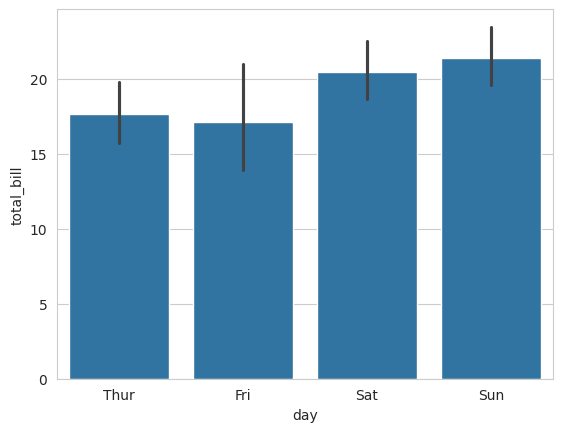

In [27]:
sns.barplot(x='day',y='total_bill',data=tips)
#요일별로 가격이 조금씩 차이가 난다
#특히 주말에 높은 수치를 보인다
#까만 선 : 신뢰구간 -> 금요일은 신뢰구간이 길다 -> 다양한 가격대

<Axes: xlabel='day', ylabel='total_bill'>

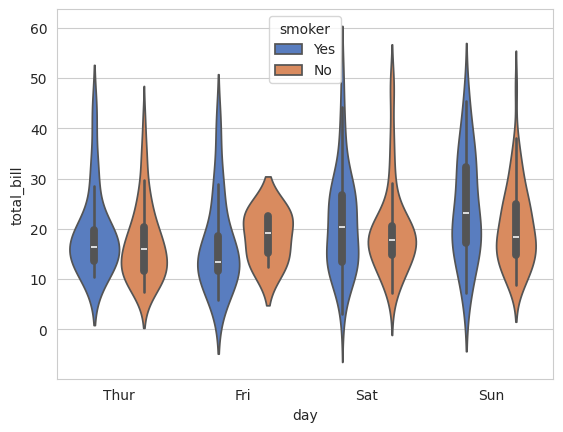

In [29]:
sns.violinplot(x='day',y='total_bill',hue='smoker',data=tips, palette = 'muted')
#violinplot : boxplot보다 분포를 더 자세히 나타낸 것, 평균을 보기 쉽다
#pallete : 색 설정
#흡연자가 더 고가의 음식을 먹음
#목요일에는 전체적으로 저렴한 음식을 먹음
#금요일에 비흡연자는 고가, 저가가 아닌 중간 가격 음식을 많이 먹음
#주말에는 상대적으로 비싼 음식을 먹은 사람들이 꽤 있음

<Axes: xlabel='day', ylabel='total_bill'>

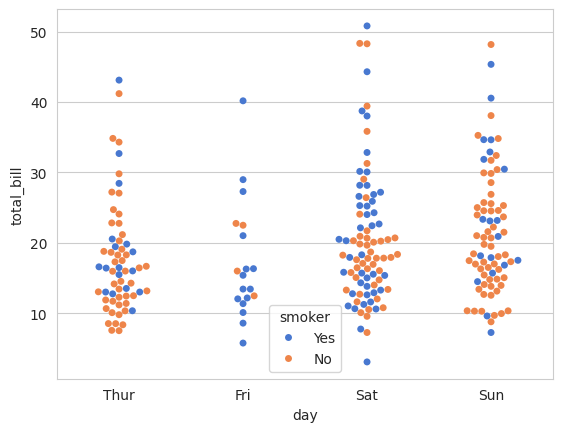

In [30]:
sns.swarmplot(x='day',y='total_bill',hue='smoker',data=tips,palette='muted')
#실제 데이터 분포를 보여줌
#영역별 데이터 양을 직관적으로 확인할 수 있다

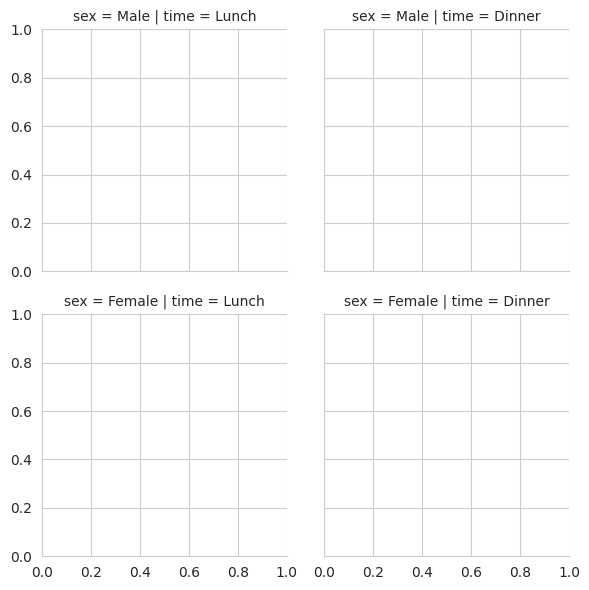

In [31]:
g = sns.FacetGrid(tips, col='time',row = 'sex')

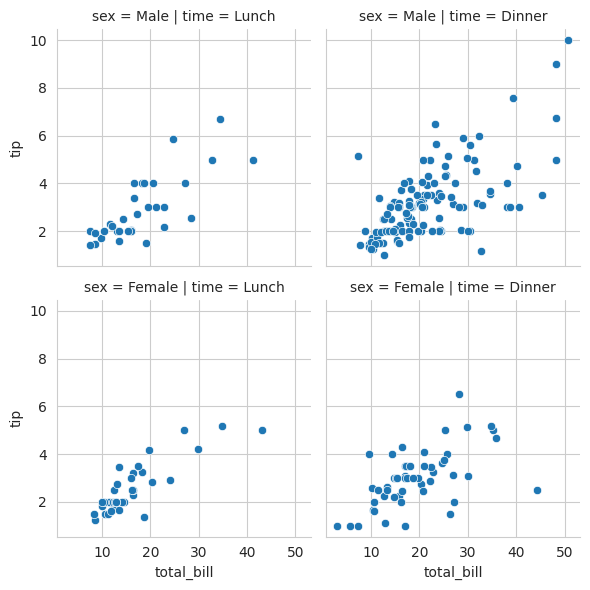

In [33]:
g = sns.FacetGrid(tips, col='time',row = 'sex')
g.map(sns.scatterplot,'total_bill','tip')
#범주형 데이터의 다양한 관점에서 볼 수 있다

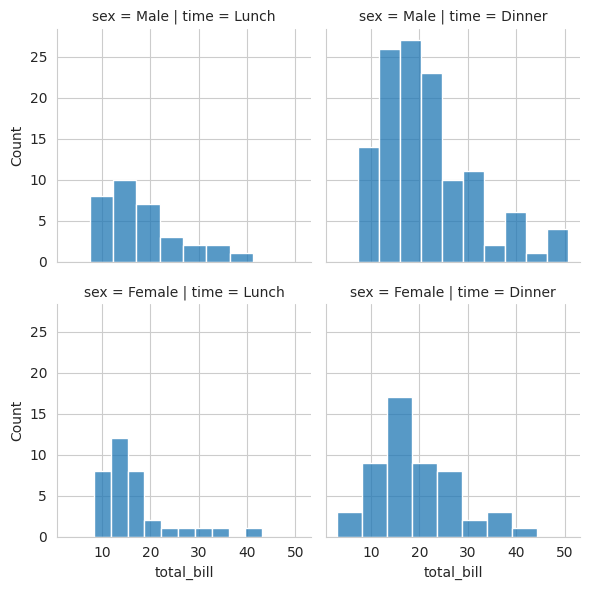

In [34]:
g = sns.FacetGrid(tips, col='time',row = 'sex')
g.map_dataframe(sns.histplot,'total_bill')

#Plotly(플롯리)
##- 비즈니스 인텔리전스(Business Intelligence) 대시보드로 개발된 도구
##-> BI도구라고 불림
##-> 사내 여러 데이터들을 정리하여 의사결정을 도움


#01 애플리케이션
##- 사용자에게 그래프를 제공함
##matplotlib + seaborn : 데이터 분석가들이 데이터의 형태나 분포를 살피기 위해 코드로 사용하는 도구
#02 인터랙션 그래프 지원
##- 그래프 생성 이후 사용자가 인터페이스를 통해 조절 가능


In [35]:
import plotly.express as px#사용자와 상호작용 가능(interaction)

In [37]:
df = px.data.iris()#plotly에서 제공하는 꽃 데이터
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [38]:
fig = px.scatter(df,x='sepal_width',y='sepal_length')#그래프에 커서(마우스)를 갖다대면 정보가 뜬다
fig.show()

In [40]:
fig = px.parallel_coordinates(df,color='species_id', labels={'species_id':'Species',
                                                             'sepal_width':'Sepal Width',
                                                             'sepal_length':'Sepla Length',
                                                             'petal_width':'Petal Width',
                                                             'petal_length':'Petal Length'},
                                                             color_continuous_scale=px.colors.diverging.Tealrose,
                                                             color_continuous_midpoint=2)
fig.show()
#matplotlib도 가능함
#꽃 종류별 특징이 어떤지 볼 수 있다.

#실습

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

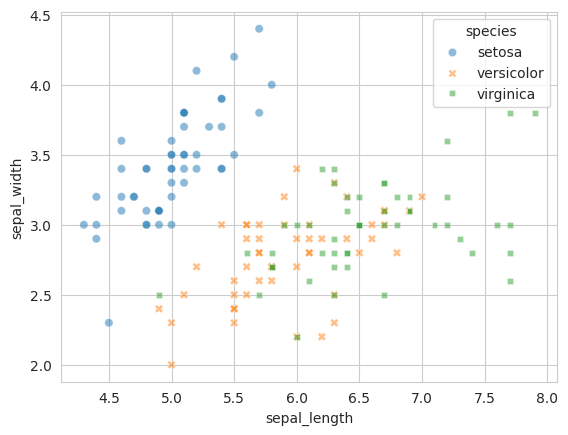

In [55]:
sns.scatterplot(df,x='sepal_length',y='sepal_width', hue = 'species', alpha = 0.5, style = 'species')

<function matplotlib.pyplot.show(close=None, block=None)>

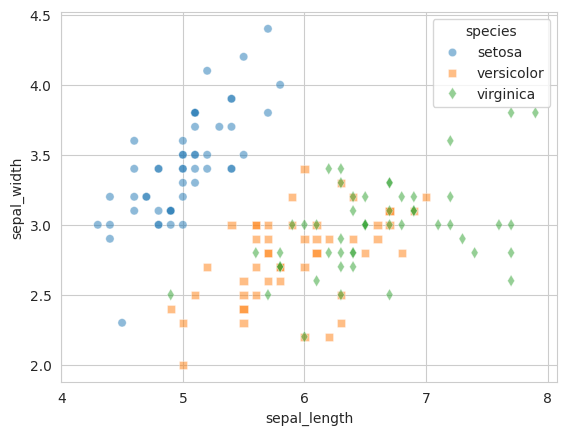

In [62]:
sns.scatterplot(df, x='sepal_length', y='sepal_width', hue='species', alpha=0.5,
                style='species', markers={'setosa': 'o', 'virginica': 'd', 'versicolor': 's'})
plt.xticks(np.arange(4.0, 9.0, 1.0))
plt.show

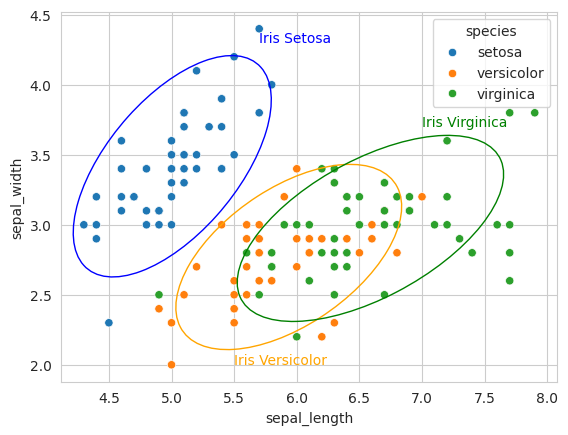

In [92]:
from matplotlib.patches import Ellipse
sns.scatterplot(x = df['sepal_length'], y =df['sepal_width'], hue = df['species'])

#setosa의 sepal_length, sepal width 평균
setosa_x = df[df['species'] == 'setosa']['sepal_length'].mean()
setosa_y = df[df['species'] == 'setosa']['sepal_width'].mean()

versicolor_x = df[df['species'] == 'versicolor']['sepal_length'].mean()
versicolor_y = df[df['species'] == 'versicolor']['sepal_width'].mean()

virginica_x = df[df['species'] == 'virginica']['sepal_length'].mean()
virginica_y = df[df['species'] == 'virginica']['sepal_width'].mean()

#타원 그리기
plt.gca().add_patch(Ellipse((setosa_x, setosa_y), 2,1,angle = 45, color = 'b', fill=False))
plt.gca().add_patch(Ellipse((versicolor_x, versicolor_y), 2,1, angle = 30, color = 'orange', fill=False))
plt.gca().add_patch(Ellipse((virginica_x,virginica_y), 2.3,1,angle=25, color = 'g', fill=False))

plt.text(5.7, 4.3, 'Iris Setosa', color = 'blue')
plt.text(5.5, 2.0, 'Iris Versicolor', color = 'orange')
plt.text(7.0, 3.7, 'Iris Virginica', color = 'green')

plt.show()


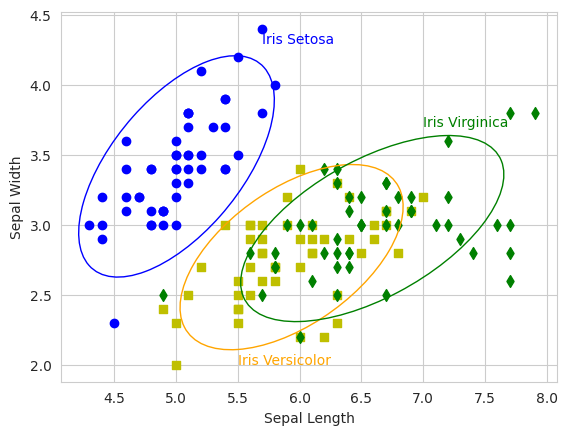

In [99]:
from matplotlib.patches import Ellipse

plt.scatter(df[df['species'] == 'setosa']['sepal_length'],df[df['species'] == 'setosa']['sepal_width'], color = 'blue',marker = 'o')
plt.scatter(df[df['species'] == 'versicolor']['sepal_length'],df[df['species'] == 'versicolor']['sepal_width'], color = 'y',marker = 's')
plt.scatter(df[df['species'] == 'virginica']['sepal_length'],df[df['species'] == 'virginica']['sepal_width'], color = 'g',marker = 'd')

#setosa의 sepal_length, sepal width 평균
setosa_x = df[df['species'] == 'setosa']['sepal_length'].mean()
setosa_y = df[df['species'] == 'setosa']['sepal_width'].mean()

versicolor_x = df[df['species'] == 'versicolor']['sepal_length'].mean()
versicolor_y = df[df['species'] == 'versicolor']['sepal_width'].mean()

virginica_x = df[df['species'] == 'virginica']['sepal_length'].mean()
virginica_y = df[df['species'] == 'virginica']['sepal_width'].mean()

#타원 그리기
plt.gca().add_patch(Ellipse((setosa_x, setosa_y), 2,1,angle = 45, color = 'b', fill=False))
plt.gca().add_patch(Ellipse((versicolor_x, versicolor_y), 2,1, angle = 30, color = 'orange', fill=False))
plt.gca().add_patch(Ellipse((virginica_x,virginica_y), 2.3,1,angle=25, color = 'g', fill=False))

plt.text(5.7, 4.3, 'Iris Setosa', color = 'blue')
plt.text(5.5, 2.0, 'Iris Versicolor', color = 'orange')
plt.text(7.0, 3.7, 'Iris Virginica', color = 'green')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()
